In [67]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [68]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [69]:
NUM_CLASSES = 10

# 学習データ読み込み

In [70]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [71]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [74]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_6 (Dropout)                  │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,180 (4.61 KB)

 Trainable params: 1,180 (4.61 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [76]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [77]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 8s 424ms/step - accuracy: 0.1328 - loss: 2.2751
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1685 - loss: 2.2698 - val_accuracy: 0.4501 - val_loss: 2.0913
Epoch 2/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3359 - loss: 2.1125
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3268 - loss: 2.1196 - val_accuracy: 0.4665 - val_loss: 1.9598
Epoch 3/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4141 - loss: 2.0428
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3971 - loss: 2.0128 - val_accuracy: 0.4665 - val_loss: 1.8299
Epoch 4/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4453 - loss: 1.8880
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.kera

In [78]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9352 - loss: 0.2994 


In [79]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [80]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[9.9357468e-01 2.2435520e-08 2.6240068e-17 6.2384726e-03 1.2486287e-05
 3.9526496e-16 1.6187598e-14 1.3555715e-05 1.6070348e-04 6.2723302e-08]
0


# 混同行列

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step


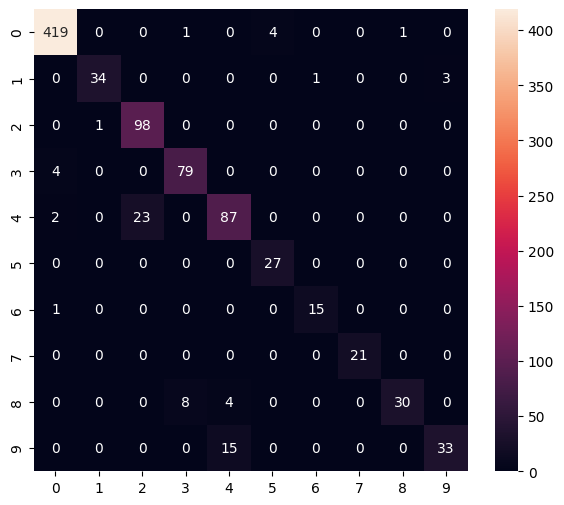

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       425
           1       0.97      0.89      0.93        38
           2       0.81      0.99      0.89        99
           3       0.90      0.95      0.92        83
           4       0.82      0.78      0.80       112
           5       0.87      1.00      0.93        27
           6       0.94      0.94      0.94        16
           7       1.00      1.00      1.00        21
           8       0.97      0.71      0.82        42
           9       0.92      0.69      0.79        48

    accuracy                           0.93       911
   macro avg       0.92      0.89      0.90       911
weighted avg       0.93      0.93      0.92       911



In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [82]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [83]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\JELLYF~1\AppData\Local\Temp\tmpqo1ewow4\assets


INFO:tensorflow:Assets written to: C:\Users\JELLYF~1\AppData\Local\Temp\tmpqo1ewow4\assets


Saved artifact at 'C:\Users\JELLYF~1\AppData\Local\Temp\tmpqo1ewow4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1652718756368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1652669035728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1652669034960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1652669030928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1652669036112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1652669033424: TensorSpec(shape=(), dtype=tf.resource, name=None)


6896

# 推論テスト

In [84]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

C:\Users\JellyFish\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [85]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [86]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [87]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [88]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.93574679e-01 2.24355201e-08 2.62400649e-17 6.23847544e-03
 1.24862763e-05 3.95264934e-16 1.61875958e-14 1.35557275e-05
 1.60703639e-04 6.27232950e-08]
0
